In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [2]:
df = pd.read_csv('/content/02colabBalanceAbandonoEmpleadoORIGINAL.csv')

In [3]:
# Mostrar las primeras filas del DataFrame
print(df.head())

# Obtener información sobre las columnas y los tipos de datos
print(df.info())

# Obtener estadísticas resumidas de las columnas numéricas
print(df.describe())

       ID  satisfaction_level  last_evaluation  number_project  \
0  2001.0                0.58             0.74             4.0   
1  2002.0                0.82             0.67             2.0   
2  2003.0                0.45             0.69             5.0   
3  2004.0                0.78             0.82             5.0   
4  2005.0                0.49             0.60             3.0   

   average_montly_hours  time_spend_company  Work_accident  \
0                 215.0                 3.0            0.0   
1                 202.0                 3.0            0.0   
2                 193.0                 3.0            0.0   
3                 247.0                 3.0            0.0   
4                 214.0                 2.0            0.0   

   promotion_last_5years   IT  RandD  ...  management  marketing  product_mng  \
0                    0.0  0.0    0.0  ...         0.0        0.0          0.0   
1                    0.0  0.0    0.0  ...         0.0        0.0    

In [4]:
df.sample(5)

,ID,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,IT,RandD,...,management,marketing,product_mng,sales,support,technical,high,low,medium,left
13916,12489.0,0.100000,0.830000,7.0,276.0,4.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1
16948,1665.0,0.434061,0.526243,2.0,130.0,3.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
12059,632.0,0.340000,0.670000,4.0,141.0,2.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1
7283,9284.0,0.500000,0.500000,3.0,184.0,3.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0
7662,9663.0,0.440000,0.460000,3.0,121.0,3.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0


In [9]:
from sklearn.model_selection import train_test_split

# Definir características (X) y variable objetivo (y)
X = df.drop(columns=['ID', 'left'])  # Todas las columnas excepto 'ID' y 'left' son características
y = df['left']  # 'left' es la variable objetivo

# Dividir los datos en entrenamiento (70%), validación (15%), y prueba (15%)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Mostrar las formas de los conjuntos de datos resultantes
print("Forma de X_train:", X_train.shape)
print("Forma de X_val:", X_val.shape)
print("Forma de X_test:", X_test.shape)

print("Forma de y_train:", y_train.shape)

Forma de X_train: (15999, 20)
Forma de X_val: (3429, 20)
Forma de X_test: (3429, 20)
Forma de y_train: (15999,)


In [10]:
# Verificar si hay valores faltantes en X_train y y_train
print(X_train.isnull().sum())
print(y_train.isnull().sum())

satisfaction_level       1
last_evaluation          1
number_project           1
average_montly_hours     1
time_spend_company       1
Work_accident            1
promotion_last_5years    1
IT                       1
RandD                    1
accounting               1
hr                       1
management               1
marketing                1
product_mng              1
sales                    1
support                  1
technical                1
high                     1
low                      1
medium                   1
dtype: int64
0


In [11]:
# Eliminar las filas con valores faltantes de X_train y y_train
X_train = X_train.dropna()
y_train = y_train[X_train.index]  # Asegúrate de alinear y_train con las filas eliminadas de X_train

In [12]:
# Crear el clasificador Random Forest
rf_model = RandomForestClassifier()

from sklearn.ensemble import RandomForestClassifier

# Definir los valores de los hiperparámetros para el Random Forest
n_estimators = 100
criterion = "gini"
max_depth = None
min_samples_split = 2
min_samples_leaf = 1
max_features = "auto"

# Crear el clasificador Random Forest con los hiperparámetros definidos
rf_model = RandomForestClassifier(n_estimators=n_estimators,
                                       criterion=criterion,
                                       max_depth=max_depth,
                                       min_samples_split=min_samples_split,
                                       min_samples_leaf=min_samples_leaf,
                                       max_features=max_features)

# Entrenar el modelo utilizando los datos de entrenamiento
rf_model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


RandomForestClassifier(max_features='auto')

Métricas en el conjunto de validación:
Accuracy: 0.978710994459026
Precision: 0.9827688651218063
Recall: 0.9740871613663133
F1-Score: 0.9784087548062703


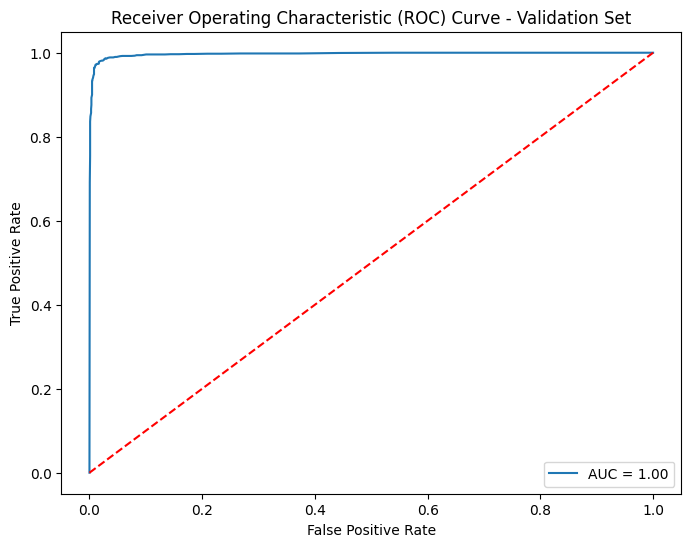

In [13]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Predicciones en el conjunto de validación
y_pred_val = rf_model.predict(X_val)

# Calcular métricas en el conjunto de validación
accuracy_val = accuracy_score(y_val, y_pred_val)
precision_val = precision_score(y_val, y_pred_val)
recall_val = recall_score(y_val, y_pred_val)
f1_val = f1_score(y_val, y_pred_val)

# Obtener probabilidades para la curva ROC en el conjunto de validación
y_probs_val = rf_model.predict_proba(X_val)
y_probs_val = y_probs_val[:, 1]  # Tomar solo las probabilidades para la clase positiva

fpr_val, tpr_val, thresholds_val = roc_curve(y_val, y_probs_val)
roc_auc_val = roc_auc_score(y_val, y_probs_val)

# Mostrar métricas del conjunto de validación
print("Métricas en el conjunto de validación:")
print(f"Accuracy: {accuracy_val}")
print(f"Precision: {precision_val}")
print(f"Recall: {recall_val}")
print(f"F1-Score: {f1_val}")

# Trazar la curva ROC del conjunto de validación
plt.figure(figsize=(8, 6))
plt.plot(fpr_val, tpr_val, label=f'AUC = {roc_auc_val:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='red')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Validation Set')
plt.legend()
plt.show()

Accuracy: 0.978710994459026
Precision: 0.9832635983263598
Recall: 0.9733727810650887
F1-Score: 0.9782931906036277


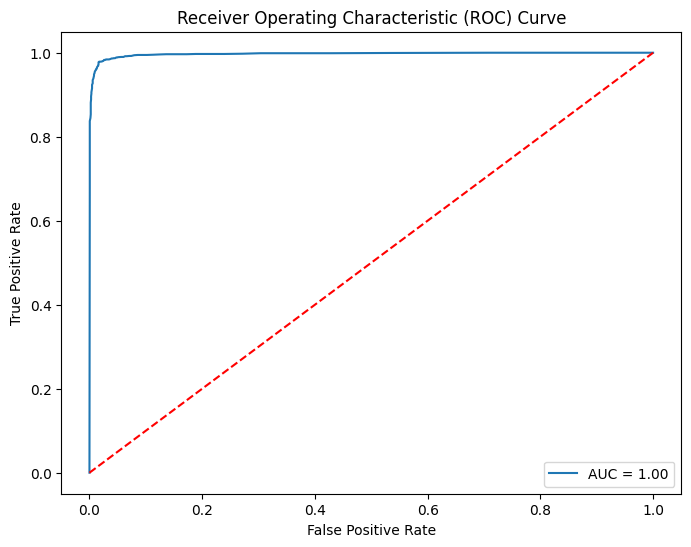

In [14]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, roc_auc_score
import matplotlib.pyplot as plt


# Predicciones en el conjunto de prueba
y_pred = rf_model.predict(X_test)

# Calcular métricas
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Obtener probabilidades para la curva ROC
y_probs = rf_model.predict_proba(X_test)
y_probs = y_probs[:, 1]  # Tomar solo las probabilidades para la clase positiva

fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = roc_auc_score(y_test, y_probs)

# Mostrar métricas
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")

# Trazar la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='red')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

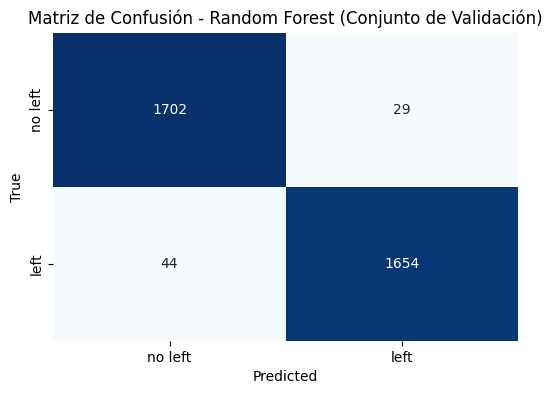

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Realizar predicciones en el conjunto de validación
y_pred_val = rf_model.predict(X_val)

# Crear la matriz de confusión para el conjunto de validación
conf_matrix_val = confusion_matrix(y_val, y_pred_val)

# Mapear los valores binarios por "left" y "no left" para la visualización en la matriz
class_mapping = {0: 'no left', 1: 'left'}
conf_matrix_labels_val = [[class_mapping[y_true], class_mapping[y_pred]] for y_true, y_pred in zip(y_val, y_pred_val)]

# Crear el gráfico de la matriz de confusión para el conjunto de validación
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_val, annot=True, fmt="d", cmap="Blues", cbar=False, xticklabels=class_mapping.values(), yticklabels=class_mapping.values())
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Matriz de Confusión - Random Forest (Conjunto de Validación)')
plt.show()


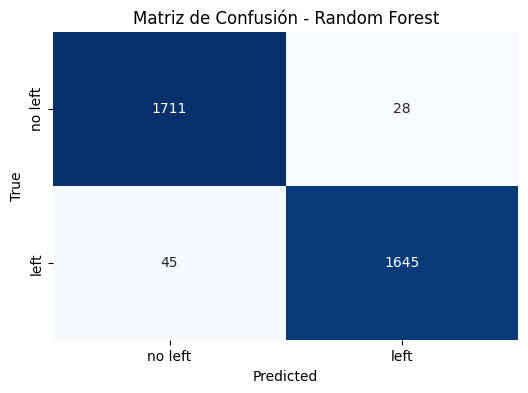

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Realizar predicciones en el conjunto de prueba
y_pred = rf_model.predict(X_test)

# Crear la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)

# Mapear los valores binarios por "left" y "no left" para la visualización en la matriz
class_mapping = {0: 'no left', 1: 'left'}
conf_matrix_labels = [[class_mapping[y_true], class_mapping[y_pred]] for y_true, y_pred in zip(y_test, y_pred)]

# Crear el gráfico de la matriz de confusión
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False, xticklabels=class_mapping.values(), yticklabels=class_mapping.values())
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Matriz de Confusión - Random Forest')
plt.show()